# Tweet Sentiment Extraction
This notebook will be doing data analysis and sentiment extraction on the Kaggle Tweet Sentiment Extraction competition on Kaggle.com.  You can find the full project and resources here:  https://www.kaggle.com/c/tweet-sentiment-extraction

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
# Import our data
df = pd.read_csv('data/train.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

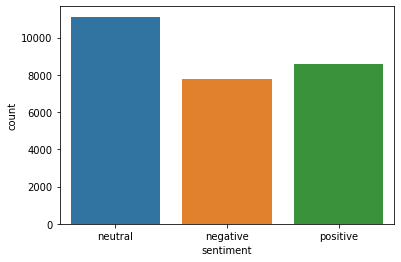

In [3]:
# Check for balance in our target label
sns.countplot(x=df['sentiment'])

In [31]:
# Check for missing values and remove them
df.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [32]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [33]:
# Function for cleaning text using regular expressions
def clean_punc(text):
  cleaned_text = re.sub(r'[^\w\s]', '', text)
  cleaned_text = re.sub(r'[0-9]', r'', cleaned_text)
  return cleaned_text

In [34]:
df['cleaned_text'] = np.vectorize(clean_punc)(df['text'])

In [35]:
df.head()

,textID,text,selected_text,sentiment,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,Id have responded if I were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,Sooo SAD I will miss you here in San Diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,Sons of why couldnt they put them on the rel...


In [36]:
#!nltk.download('stopwords')
!python -m nltk.downloader stopwords


/usr/local/Cellar/python@3.9/3.9.1_8/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeremyspradlin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:

# Remove stop words
stop_words = set(stopwords.words('english'))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x : ' '.join([w.lower() for w in x.split() if w not in stop_words and len(w) > 3]))

### Tokenizing the tweets

In [38]:
texts = df['cleaned_text'].apply(lambda x : x.split())

In [39]:
lemma = WordNetLemmatizer()
lemming_texts = texts.apply(lambda x:[lemma])
lemming_texts

0        [<WordNetLemmatizer>]
1        [<WordNetLemmatizer>]
2        [<WordNetLemmatizer>]
3        [<WordNetLemmatizer>]
4        [<WordNetLemmatizer>]
                 ...          
27475    [<WordNetLemmatizer>]
27476    [<WordNetLemmatizer>]
27477    [<WordNetLemmatizer>]
27478    [<WordNetLemmatizer>]
27479    [<WordNetLemmatizer>]
Name: cleaned_text, Length: 27480, dtype: object

In [28]:
for i in range(len(lemming_texts)):
    lemming_texts[i] = ' '.join(lemming_texts[i])
    
df['cleaned_text'] = lemming_texts

TypeError: sequence item 0: expected str instance, WordNetLemmatizer found